In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [10]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [11]:
data.reset_index(inplace=True)

In [12]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746803,96.645521,93.384904,94.975448,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


In [13]:
 ma_100_days = data.Close.rolling(100).mean()

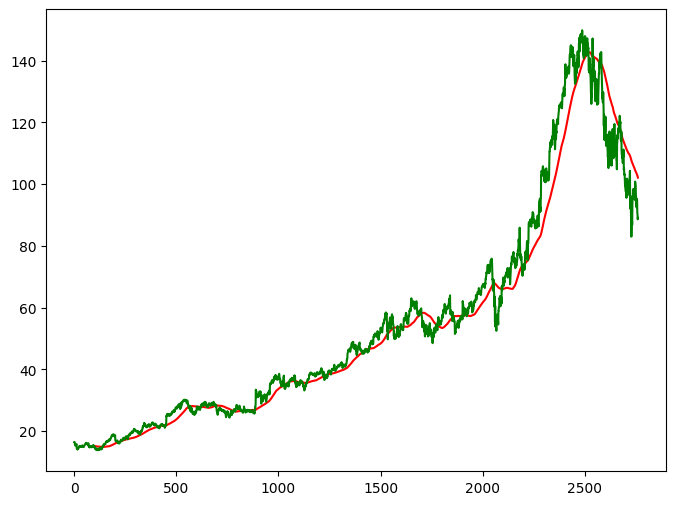

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [15]:
ma_200_days = data.Close.rolling(200).mean()

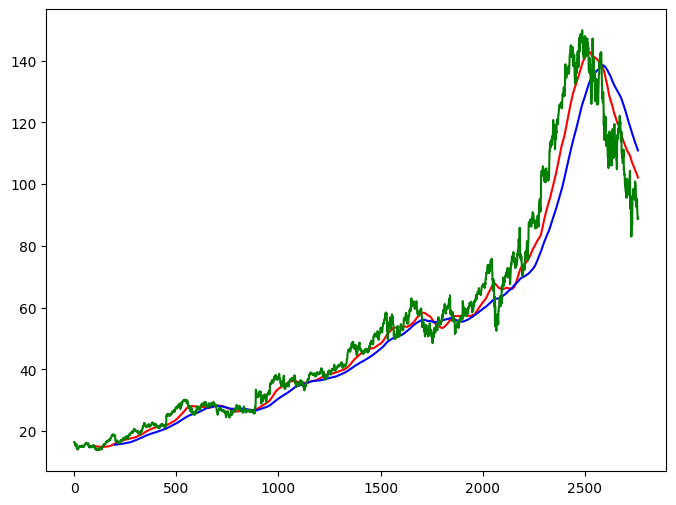

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [17]:
data.dropna(inplace=True)

In [37]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [38]:
data_train.shape[0]

2208

In [39]:
data_test.shape[0]

553

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
data_train_scale = scaler.fit_transform(data_train)

In [70]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [71]:
x,y = np.array(x), np.array(y)

In [72]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
import numpy as np

In [73]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [75]:
model.fit(x,y,epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.0789
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0087
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0077
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0068
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0052
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0051
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0049
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0039
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0047
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0039
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0039
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0029
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0037
Ep

In [76]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [77]:
  pas_100_days = data_train.tail(100)

In [78]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [79]:
data_test_scale = scaler.fit_transform(data_test)

In [80]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)


In [81]:
y_predict =  model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step


In [82]:
scale = 1/scaler.scale_

In [83]:
y_predict = y_predict*scale

In [84]:
y = y*scale

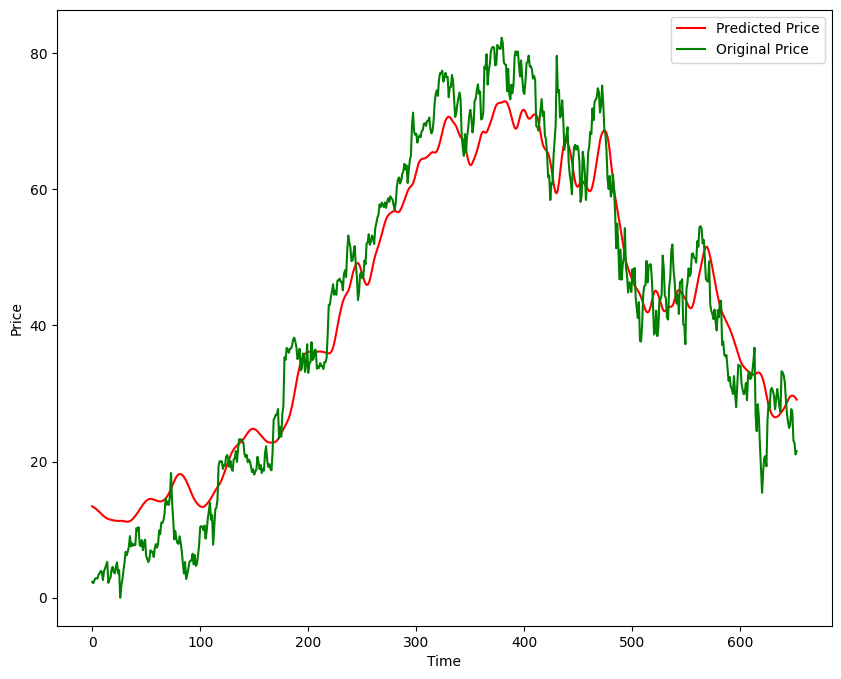

In [85]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [86]:
model.save('Stock Prediction Model.keras')